In [1]:
import glob
import os

import numpy as np
import ultraplot as uplt

In [2]:
fname = "y6_covmat_dv9p1_1106_snonly.ini"
odir = "output"
bname = fname.split(".")[0]


def _read_cov_dim(odir, bname):
    maxind = None
    minind = None
    pth = os.path.join(odir, "order_" + bname + "*")
    fnames = glob.glob(pth)
    for fname in fnames:
        with open(fname) as fp:
            for line in fp.readlines():
                if line.startswith("#"):
                    continue
                vals = line.strip().split()
                ind = int(vals[0])
                if maxind is None:
                    maxind = ind
                else:
                    maxind = max(maxind, ind)

                if minind is None:
                    minind = ind
                else:
                    minind = min(minind, ind)

    return minind, maxind + 1


def _read_cov_values(odir, bname):
    pth = os.path.join(odir, bname)
    fnames = sorted(glob.glob(pth + "*"))
    start, ndim = _read_cov_dim(odir, bname)

    cov_sg = np.zeros((ndim, ndim))
    cov_ng = np.zeros((ndim, ndim))

    fnames = [
        fname
        for fname in fnames
        if bname + "." not in fname
    ]

    fnames = {
        int(fname.rsplit("_", 1)[1]): fname
        for fname in fnames
    }

    for i in range(len(fnames)):
        fname = fnames[i+1]
        with open(fname) as fp:
            for line in fp.readlines():
                if line.startswith("#"):
                    continue
                vals = line.strip().split()

                i1 = int(vals[0])
                i2 = int(vals[1])
                sg = float(vals[8])
                ng = float(vals[9])

                cov_sg[i1, i2] = sg
                cov_sg[i2, i1] = sg
                cov_ng[i1, i2] = ng
                cov_ng[i2, i1] = ng

    return cov_sg[start:, start:], cov_ng[start:, start:]

In [3]:
cov_sg, cov_ng = _read_cov_values(odir, bname)

cov_sg_all, cov_ng = _read_cov_values(odir + "_gauss_plus_sn", bname)

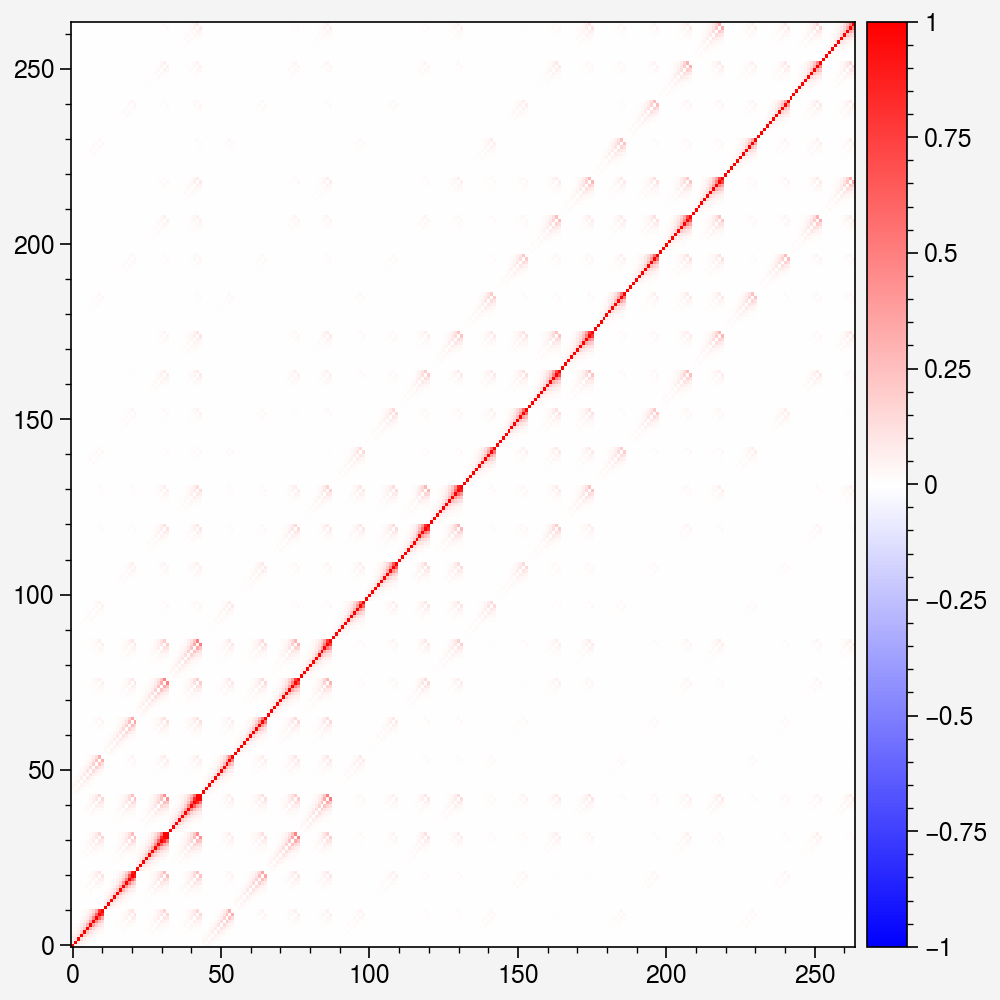

In [4]:
std = np.sqrt(np.diag(cov_sg))
corr = cov_sg / np.outer(std, std)


fig, axs = uplt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax = axs[0, 0]

m = ax.pcolormesh(corr, cmap="bwr", vmin=-1, vmax=1, discrete=False)
ax.format(grid=False)
ax.colorbar(m, loc="r")

In [5]:
with open("../cosmocov_sn_ggl.txt", "w") as fp:
    for el in np.sqrt(np.diag(cov_sg)):
        fp.write(f"{el}\n")

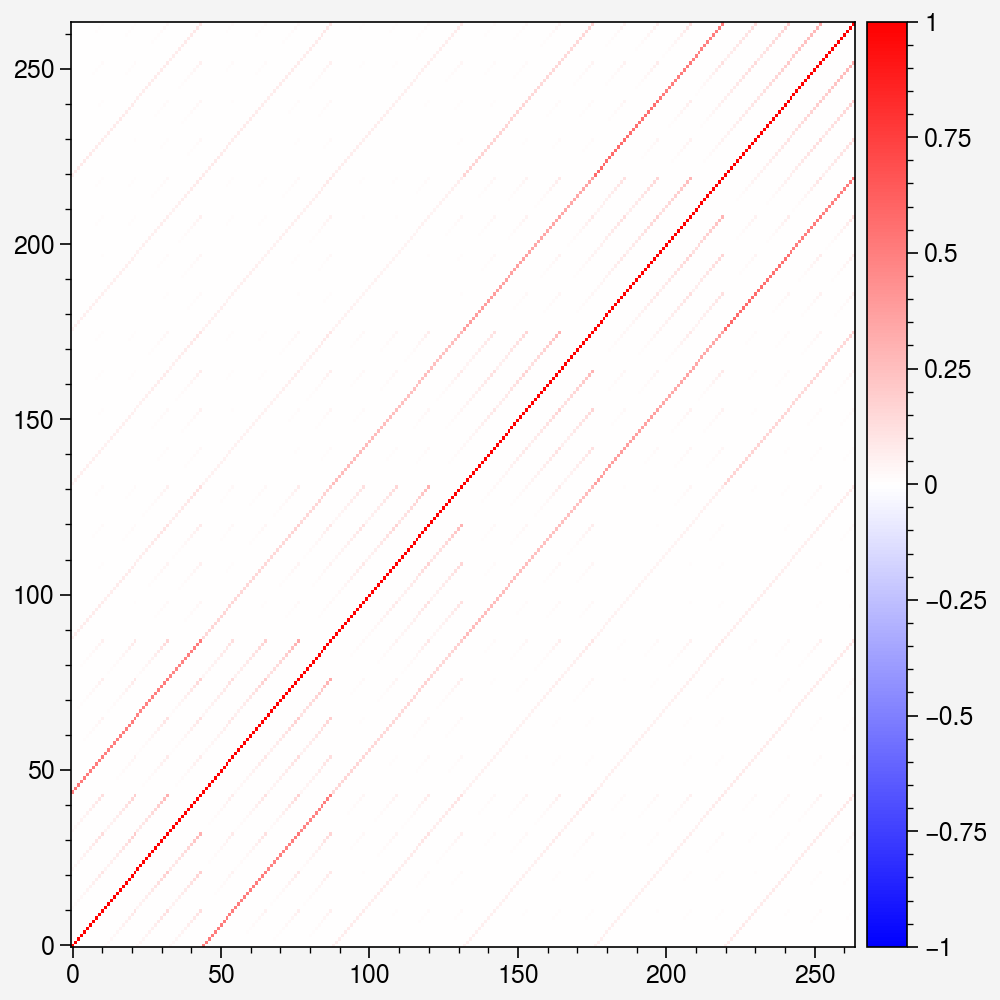

In [6]:
cov_g = cov_sg_all - cov_sg
std = np.sqrt(np.diag(cov_g))
corr = cov_g / np.outer(std, std)


fig, axs = uplt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax = axs[0, 0]

m = ax.pcolormesh(corr, cmap="bwr", vmin=-1, vmax=1, discrete=False)
ax.format(grid=False)
ax.colorbar(m, loc="r")